# Experiment 03
## *Implement Feed forward neural network with three hidden layers for classification on CIFAR-10 dataset.*

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.2730 - loss: 1.9997 - val_accuracy: 0.3558 - val_loss: 1.7332
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3899 - loss: 1.6999 - val_accuracy: 0.3776 - val_loss: 1.7174
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.4302 - loss: 1.5961 - val_accuracy: 0.4256 - val_loss: 1.6138
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.4530 - loss: 1.5317 - val_accuracy: 0.4485 - val_loss: 1.5318
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4702 - loss: 1.4851 - val_accuracy: 0.4632 - val_loss: 1.5017
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4615 - loss: 1.5026
Test accuracy: 46.32 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


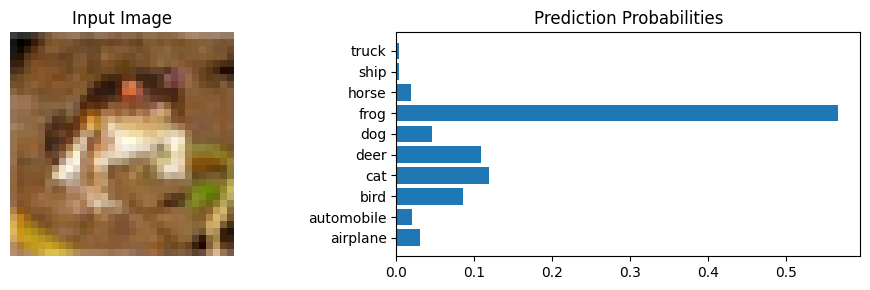

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------- Load and Normalize the Data -----------------------------
(xtr, ytr), (xte, yte) = cifar10.load_data()
xtr, xte = xtr / 255.0, xte / 255.0
ytr, yte = to_categorical(ytr), to_categorical(yte)

# ----------------------------- Build the Model -----------------------------
model = Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# ----------------------------- Compile the Model -----------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ----------------------------- Train the Model -----------------------------
history = model.fit(xtr, ytr, epochs=5, batch_size=64, validation_data=(xte, yte))

# ----------------------------- Evaluate the Model -----------------------------
_, acc = model.evaluate(xte, yte)
print("Test accuracy:", round(acc * 100, 4), "%")

# ----------------------------- Predict and Visualize -----------------------------
sample_img = xtr[:1]
pred = model.predict(sample_img)

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(sample_img[0])
axs[0].axis('off')
axs[0].set_title("Input Image")

axs[1].barh(class_labels, pred[0])
axs[1].set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()
